# Anorthosite xenolith ATRM data analyses

In [1]:
import pandas as pd
import numpy as np

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

## defining functions for reading magnetometer files and making plots

In [2]:
# get specimen list from sam file
def get_specimen_list(SAM_file_path):
    this_file = open(SAM_file_path, 'r')
    lines = this_file.readlines()
    specimen_list = list()
    for i in range (2, len(lines)):
        thisline = lines[i].split('\n')
        specimen_list.append(thisline[0])
    return specimen_list

def plot_ATRM(angle_list, moment_list, spec_name = '', savefig = False):
    moment_list = [i/max(moment_list) for i in moment_list] # normalize the moment list
    
    plt.plot(angle_list, moment_list, '.-')
    plt.xlabel('Angle of applied field ($^\circ$)')
    plt.ylabel('Normalized Full TRM')
    
    plt.title(spec_name + ' ATRM plot')
    if savefig == True:
        plt.savefig(spec_name + ' ATRM_plot.pdf')
    plt.show()

def plot_TRM_nonlinear(field_list, moment_list, spec_name = '', savefig = False):
    moment_list = [i/max(moment_list) for i in moment_list] # normalize the moment list
    plt.plot(field_list, moment_list, '.-')
    plt.xlabel('Strenth of applied lab field ($\mu$T)')
    plt.ylabel('Normalized Full TRM')
    plt.plot([min(field_list), max(field_list)],[min(field_list)/max(field_list), max(moment_list)], '--', color = 'grey')
    plt.title(spec_name + ' TRM nonlinear plot')
    if savefig == True:
        plt.savefig(spec_name + ' TRM_nonlinear_plot.pdf')
    plt.show()

## ATRM given a total TRM in different orientations with respect to the laboratory field

Here we performed an experiment with an anisotropic specimen given a total TRM in different orientations with respect to the laboratory field. The angles are rotated along the xy plane of the specimen coordinates. The angles are with respect to the marked arrow for orientation. The list of angles we used are: [0, 45, 90, 135, 180, 225, 270, 315] in degrees.
A schematic cartoon is shown below (Redrawn from Selkin et al., 2000.)

<img src='../Figure/ATRM_cartoon.png'>

The experiment turns out to show that there is not a significant amount of anisotropy, at least in site AX3. the most anisotropic specimen has just over 20% differences in moment, the majority of the specimens show fluctuatios within 10%. 

In [3]:
angle_list = [0, 45, 90, 135, 180, 225, 270, 315]

In [4]:
specimen_list = get_specimen_list('../Data/Rock_mag/AX_ATRM/AX_ATRM.sam')

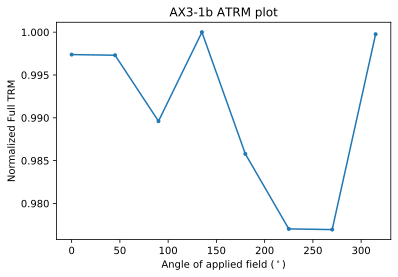

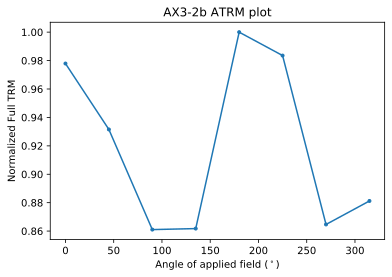

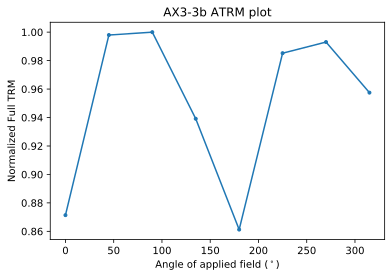

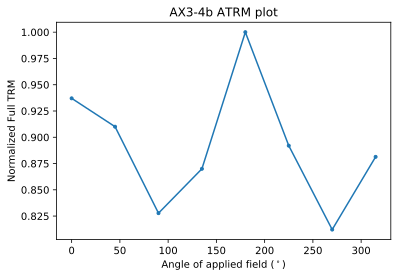

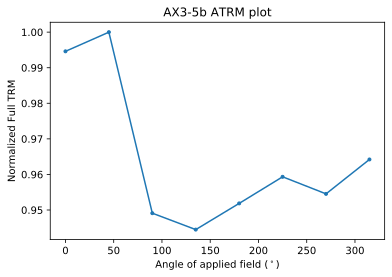

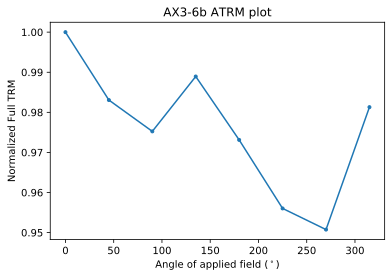

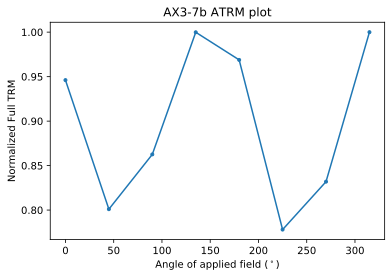

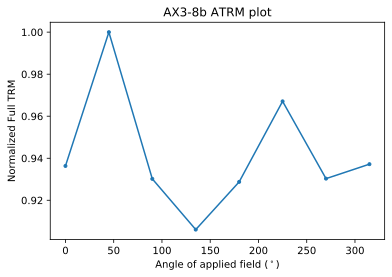

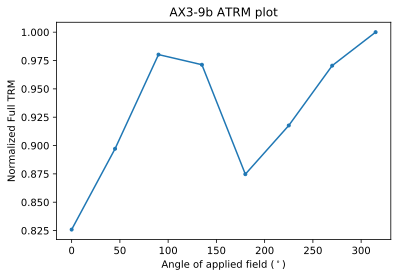

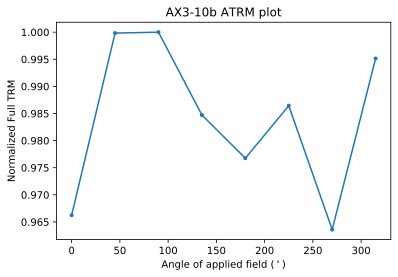

In [6]:
for i in range(len(specimen_list)):
    this_file = open('../Data/Rock_mag/AX_ATRM/' + specimen_list[i], 'r')
    lines = this_file.readlines()
    for j in range(2, len(lines)):
        lines[j] = lines[j][7:]
    data_lines = lines[2:]

    moment_list = list()
    geo_dec = list()
    geo_inc = list()
    spec_dec = list()
    spec_inc = list()
    
    xy_component = list()
    
    # here we are getting the ATRM data
    for k in range(len(angle_list)):
        geo_dec.append(float(data_lines[k][0:5]))
        geo_inc.append(float(data_lines[k][6:11]))
        moment_list.append(float(data_lines[k][24:32]))
        spec_dec.append(float(data_lines[k][39:44]))
        spec_inc.append(float(data_lines[k][46:50]))
    
    # here we are getting the nnonlinear TRM data
#     for n in range(len(angle_list), len(data_lines)):
#         nl_geo_dec.append(float(data_lines[k][0:5]))
#         nl_geo_inc.append(float(data_lines[k][6:11]))
#         nl_moment_list.append(float(data_lines[k][24:32]))
#         nl_spec_dec.append(float(data_lines[k][39:44]))
#         nl_spec_inc.append(float(data_lines[k][46:50]))
        
    for m in range(len(moment_list)):
        cart = pmag.dir2cart([spec_dec[m],spec_inc[m],moment_list[m]])
        xy = np.sqrt(cart[0]**2+cart[1]**2)
        xy_component.append(xy)
#     print(xy_component)
    plot_ATRM(angle_list, xy_component, spec_name = specimen_list[i])
    
#     plot_ATRM(angle_list, xy_component, spec_name = specimen_list[i])
    
# processed_file = pd.read_csv(lines, sep=' ', header = 1)
# data_lines[0][0:5]

## TRM non-linear test

We also performed full TRM acquisition experiment at different lab fields. the choses fields are; [30, 50, 70, 90] $\mu$T. The TRM is imparted along specimen Z axis. 
The results turns out to be quite nice: that at least in this site, we do not have a significant non-linear behavior in the specimens, at least for lab fields lower than 90 micro tesla. 

In [7]:
field_list = [30, 50, 70, 90] # unit in uT

In [8]:
specimen_list = get_specimen_list('../Data/Rock_mag/AX_ATRM/AX_ATRM.sam')

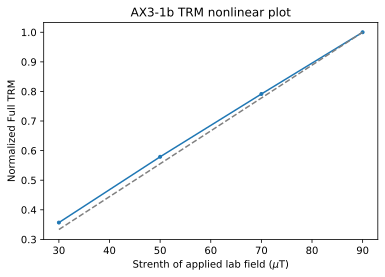

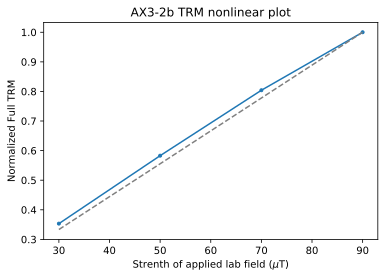

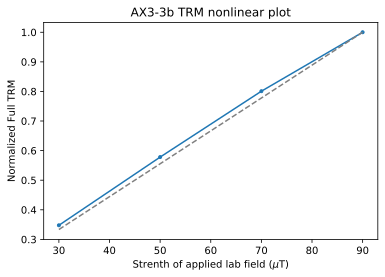

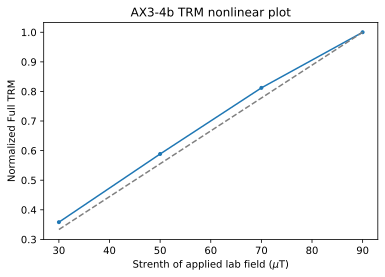

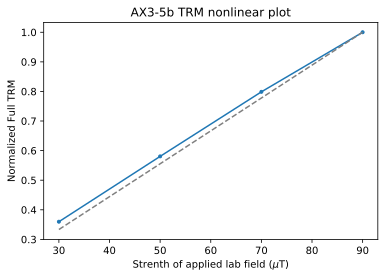

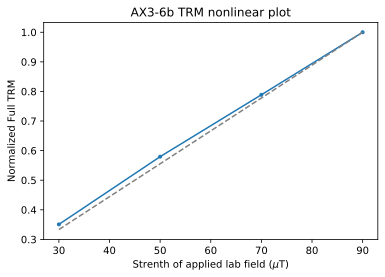

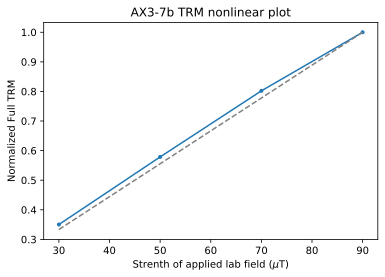

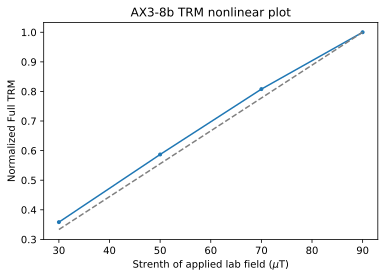

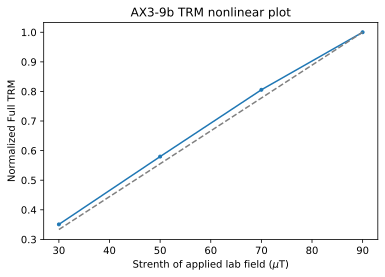

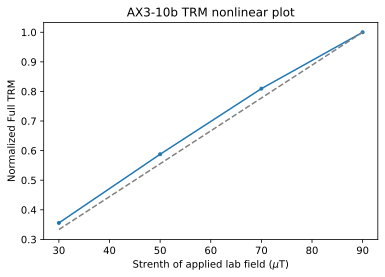

In [9]:
for i in range(len(specimen_list)):
    this_file = open('../Data/Rock_mag/AX_ATRM/' + specimen_list[i], 'r')
    lines = this_file.readlines()
    for j in range(2, len(lines)):
        lines[j] = lines[j][7:]
    data_lines = lines[2:]

    moment_list = list()
    geo_dec = list()
    geo_inc = list()
    spec_dec = list()
    spec_inc = list()
    
    nl_moment_list = list()
    nl_geo_dec = list()
    nl_geo_inc = list()
    nl_spec_dec = list()
    nl_spec_inc = list()
    
    xy_component = list()
    
    # here we are getting the ATRM data
    for k in range(len(angle_list)):
        geo_dec.append(float(data_lines[k][0:5]))
        geo_inc.append(float(data_lines[k][6:11]))
        moment_list.append(float(data_lines[k][24:32]))
        spec_dec.append(float(data_lines[k][39:44]))
        spec_inc.append(float(data_lines[k][46:50]))
    
    # here we are getting the nnonlinear TRM data
    for n in range(len(angle_list), len(data_lines)):
        nl_geo_dec.append(float(data_lines[n][0:5]))
        nl_geo_inc.append(float(data_lines[n][6:11]))
        nl_moment_list.append(float(data_lines[n][24:32]))
        nl_spec_dec.append(float(data_lines[n][39:44]))
        nl_spec_inc.append(float(data_lines[n][46:50]))
        
#     for m in range(len(moment_list)):
#         cart = pmag.dir2cart([spec_dec[m],spec_inc[m],moment_list[m]])
#         xy = np.sqrt(cart[0]**2+cart[1]**2)
#         xy_component.append(xy)
#     print(xy_component)
#     plot_ATRM(angle_list, xy_component, spec_name = specimen_list[i])
    
    plot_TRM_nonlinear(field_list, nl_moment_list, spec_name = specimen_list[i])
    
# processed_file = pd.read_csv(lines, sep=' ', header = 1)
# data_lines[0][0:5]